First of all we will start by importing all the packages we will need in this project

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn import metrics

Now we will load the dataset

In [3]:
data = pd.read_csv("data.csv",header=0)

In [4]:
# Show the first five rows of the data
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# Drop the two columns which are not useful
data.drop("Unnamed: 32",axis=1,inplace=True)
data.drop("id",axis=1,inplace=True)

In [6]:
# By looking at the columns of the dataset we can divide it into two parts
features_mean= list(data.columns[1:11])
features_se= list(data.columns[11:20])
features_worst=list(data.columns[21:31])

In [7]:
# Now as ou know our diagnosis column is a object type so we can map it to integer value
data['diagnosis'] = data['diagnosis'].map({"M":1, "B":0})

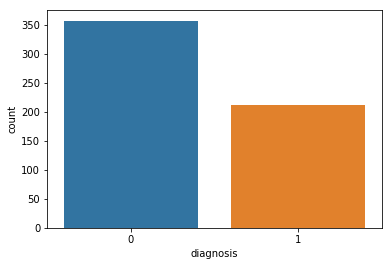

In [8]:
# Plot the count of Malignant and Benign tumors
sns.countplot(data['diagnosis'])

In [9]:
# We can achieve good performance by using just these 5 features as other features are correlated
prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']

In [10]:
# Split the data into training and test set
train, test = train_test_split(data, test_size = 0.3)

In [11]:
# Check the dimensions of training and test data
print(train.shape)
print(test.shape)

(398, 31)
(171, 31)


In [12]:
train_X = train[prediction_var] # taking the training data input 
train_y=train.diagnosis # This is output of our training data
# same we have to do for test
test_X= test[prediction_var] # taking test data inputs
test_y =test.diagnosis   #output value of test data

In [13]:
model=RandomForestClassifier(n_estimators=100)# a simple random forest model

In [14]:
model.fit(train_X,train_y)# now fit our model for traiing data

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [15]:
prediction=model.predict(test_X)# predict for the test data

In [16]:
metrics.accuracy_score(prediction,test_y) # to check the accuracy
# here we will use accuracy measurement between our predicted value and our test output values

0.9181286549707602

In [17]:
# Now we will take all features into account and show that the accuracy does not change much
prediction_var = features_mean # taking all features

In [18]:
# define train and test set on all features
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [19]:
# Using a random forest classifier
model=RandomForestClassifier(n_estimators=100)

In [20]:
# Fit the model on training set and then predict on test set
# And check accuracy
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9064327485380117

As we can see that there is not much difference in the accuracy of our classifier even if we use all features. Hence we will only use the 5 features which will increase the speed of classifier. 
We have predicted whether the tumor is benign or malignant with accuracy of about 91%.